### Importação dos dados



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [ ]:
from urllib.request import urlopen
import csv

urls = [url, url2, url3, url4]

# Função para ler CSV a partir da URL
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Análise de faturamento
faturamento_total = 0

for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    faturamento_loja = 0

    for venda in dados_loja:
        preco = float(venda['Preço'])  # Somamos apenas o preço
        faturamento_loja += preco

    print(f"Faturamento Loja {i+1}: R${faturamento_loja:.2f}")
    faturamento_total += faturamento_loja

# Mostrar faturamento total
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:.2f}")


Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


In [ ]:
# Somando apenas o preço das vendas, sem considerar as parcelas
faturamento_loja1 = loja['Preço'].astype(float).sum()
faturamento_loja2 = loja2['Preço'].astype(float).sum()
faturamento_loja3 = loja3['Preço'].astype(float).sum()
faturamento_loja4 = loja4['Preço'].astype(float).sum()

# Mostrar os resultados
print(f"Faturamento Loja 1: R${faturamento_loja1:.2f}")
print(f"Faturamento Loja 2: R${faturamento_loja2:.2f}")
print(f"Faturamento Loja 3: R${faturamento_loja3:.2f}")
print(f"Faturamento Loja 4: R${faturamento_loja4:.2f}")

# Faturamento total de todas as lojas
faturamento_total = faturamento_loja1 + faturamento_loja2 + faturamento_loja3 + faturamento_loja4
print(f"\nFaturamento total de todas as lojas: R${faturamento_total:.2f}")


Faturamento Loja 1: R$1534509.12
Faturamento Loja 2: R$1488459.06
Faturamento Loja 3: R$1464025.03
Faturamento Loja 4: R$1384497.58

Faturamento total de todas as lojas: R$5871490.79


# 2. Vendas por Categoria

In [ ]:
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        # Decodificar os dados
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Dicionário para armazenar as vendas por categoria
vendas_por_categoria = {}

# Processar todas as lojas
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)
    print(f"\nVendas por categoria na Loja {i+1}:")

    # Dicionário para a loja atual
    categorias_loja = {}

    for venda in dados_loja:
        categoria = venda['Categoria do Produto']
        preco = float(venda['Preço'])
        quantidade = int(venda['Quantidade de parcelas'])
        valor_venda = preco * quantidade

        # Adicionar ao dicionário da loja atual
        if categoria in categorias_loja:
            categorias_loja[categoria] += valor_venda
        else:
            categorias_loja[categoria] = valor_venda

        # Adicionar ao dicionário geral
        if categoria in vendas_por_categoria:
            vendas_por_categoria[categoria] += valor_venda
        else:
            vendas_por_categoria[categoria] = valor_venda

    # Mostrar resultados para esta loja
    for categoria, valor in categorias_loja.items():
        print(f"  {categoria}: R${valor:.2f}")

# Mostrar resultados totais
print("\nVendas totais por categoria (todas as lojas):")
for categoria, valor in sorted(vendas_por_categoria.items(), key=lambda item: item[1], reverse=True):
    print(f"  {categoria}: R${valor:.2f}")

# Calcular o total geral
total_geral = sum(vendas_por_categoria.values())
print(f"\nTotal geral de vendas: R${total_geral:.2f}")



Vendas por categoria na Loja 1:
  eletronicos: R$1720525.18
  moveis: R$777243.14
  brinquedos: R$65412.04
  eletrodomesticos: R$1376501.27
  utilidades domesticas: R$51092.72
  esporte e lazer: R$169179.18
  livros: R$34360.24
  instrumentos musicais: R$369322.34

Vendas por categoria na Loja 2:
  moveis: R$703108.03
  instrumentos musicais: R$392599.48
  esporte e lazer: R$108879.57
  eletronicos: R$1715519.72
  utilidades domesticas: R$56984.93
  brinquedos: R$62300.37
  eletrodomesticos: R$1368304.66
  livros: R$41887.42

Vendas por categoria na Loja 3:
  eletrodomesticos: R$1441845.38
  moveis: R$740123.50
  instrumentos musicais: R$333781.40
  esporte e lazer: R$164527.29
  eletronicos: R$1468443.69
  brinquedos: R$81591.72
  utilidades domesticas: R$59635.75
  livros: R$35142.69

Vendas por categoria na Loja 4:
  eletrodomesticos: R$1172119.35
  moveis: R$742172.64
  esporte e lazer: R$133411.27
  livros: R$39390.51
  eletronicos: R$1615256.00
  instrumentos musicais: R$297117.

# Função para calcular e mostrar as vendas por categoria de uma loja
def vendas_por_categoria(loja, numero):
    vendas = loja.groupby('Categoria do Produto')['Preço'].sum()
    print(f"\nVendas por categoria na Loja {numero}:")
    print(vendas)

# Mostrar resultados para cada loja
  vendas_por_categoria(loja, 1)
  vendas_por_categoria(loja2, 2)
  vendas_por_categoria(loja3, 3)
  vendas_por_categoria(loja4, 4)


# 3. Média de Avaliação das Lojas


In [ ]:
def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        # Decodificar os dados
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Calcular a avaliação média para cada loja
for i, url in enumerate(urls):
    dados_loja = ler_csv(url)

    # Variáveis para calcular a média
    soma_avaliacoes = 0
    quantidade_produtos = 0

    for produto in dados_loja:
        try:
            # Tentamos com diferentes possíveis nomes de coluna
            if 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            elif 'Avaliação da compra' in produto:
                avaliacao = float(produto['Avaliação da compra'])
            else:
                # Se não encontramos a coluna, imprimimos as chaves disponíveis
                print(f"Chaves disponíveis na loja {i+1}:", produto.keys())
                raise KeyError("Não encontramos a coluna de avaliação")

            soma_avaliacoes += avaliacao
            quantidade_produtos += 1
        except (ValueError, KeyError) as e:
            if isinstance(e, KeyError):
                raise
            # Ignoramos valores que não podem ser convertidos para float
            continue

    if quantidade_produtos > 0:
        avaliacao_media = soma_avaliacoes / quantidade_produtos
        print(f"Avaliação média da Loja {i+1}: {avaliacao_media:.2f}")
    else:
        print(f"Não foi possível processar as avaliações para a Loja {i+1}")


Avaliação média da Loja 1: 3.98
Avaliação média da Loja 2: 4.04
Avaliação média da Loja 3: 4.05
Avaliação média da Loja 4: 4.00


In [ ]:
def avaliacao_media(loja, numero):
    media = loja['Avaliação da compra'].mean()
    print(f"Avaliação média na Loja {numero}: {media:.2f}")

# Mostrar resultados para cada loja
avaliacao_media(loja, 1)
avaliacao_media(loja2, 2)
avaliacao_media(loja3, 3)
avaliacao_media(loja4, 4)


Avaliação média na Loja 1: 3.98
Avaliação média na Loja 2: 4.04
Avaliação média na Loja 3: 4.05
Avaliação média na Loja 4: 4.00


# 4. Produtos Mais e Menos Vendidos

In [ ]:
from collections import defaultdict
from urllib.request import urlopen
import csv

def ler_csv(url):
    dados = []
    with urlopen(url) as resposta:
        linhas = resposta.read().decode('utf-8').splitlines()
        leitor = csv.DictReader(linhas)
        for linha in leitor:
            dados.append(linha)
    return dados

# Função para calcular os Top 3 produtos que mais e menos dinheiro geraram
def top_produtos(dados_loja, numero_loja):
    ingreso_por_produto = defaultdict(float)

    for venda in dados_loja:
        produto = venda['Produto']
        preco = float(venda['Preço'])
        # Agora usamos apenas o preço (não multiplicamos pela quantidade de parcelas)
        ingreso_por_produto[produto] += preco

    # Convertendo para lista ordenada
    produtos_ordenados = sorted(ingreso_por_produto.items(), key=lambda x: x[1], reverse=True)

    top_mais_vendidos = produtos_ordenados[:3]
    top_menos_vendidos = produtos_ordenados[-3:]

    print(f"\nLoja {numero_loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for produto, ingreso in top_mais_vendidos:
        print(f"  {produto} - Ingresos: R${ingreso:.2f}")

    print(f"\nLoja {numero_loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for produto, ingreso in top_menos_vendidos:
        print(f"  {produto} - Ingresos: R${ingreso:.2f}")

# Percorrer todas as lojas
for i, url in enumerate(urls, start=1):
    dados_loja = ler_csv(url)
    top_produtos(dados_loja, i)



Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
  TV Led UHD 4K - Ingresos: R$189534.28
  Geladeira - Ingresos: R$149524.28
  Celular Plus X42 - Ingresos: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Ingresos: R$929.27
  Dinossauro Rex - Ingresos: R$918.40
  Corda de pular - Ingresos: R$870.89

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Ingresos: R$150967.83
  TV Led UHD 4K - Ingresos: R$137833.06
  Geladeira - Ingresos: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Ingresos: R$1142.54
  Dinossauro Rex - Ingresos: R$1027.41
  Cubo mágico 8x8 - Ingresos: R$858.22

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
  Geladeira - Ingresos: R$133185.99
  TV Led UHD 4K - Ingresos: R$128892.11
  Celular Plus X42 - Ingresos: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Ingresos: R$1137.76
  Dinossauro Rex - Ingresos: R$1060.78
  Cubo mágico 8x8 

In [ ]:


# Ler todos os CSVs e adicionar uma coluna 'Loja'
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Garantir os tipos corretos
df_total['Preço'] = df_total['Preço'].astype(float)
df_total['Quantidade de parcelas'] = df_total['Quantidade de parcelas'].astype(int)

# A receita é simplesmente o Preço (não multiplicamos pela quantidade de parcelas)
df_total['Receita'] = df_total['Preço']

# Agrupar por Loja e Produto somando a receita
vendas = df_total.groupby(['Loja', 'Produto'])['Receita'].sum().reset_index()

# Função para mostrar os 3 produtos que mais e menos dinheiro geraram
def top_produtos(loja):
    dados = vendas[vendas['Loja'] == loja]

    top_mais_vendidos = dados.sort_values(by='Receita', ascending=False).head(3)
    top_menos_vendidos = dados.sort_values(by='Receita', ascending=True).head(3)

    print(f"\n{loja} - TOP 3 produtos que MAIS dinheiro geraram:")
    for _, linha in top_mais_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

    print(f"\n{loja} - TOP 3 produtos que MENOS dinheiro geraram:")
    for _, linha in top_menos_vendidos.iterrows():
        print(f"  {linha['Produto']} - Receita: R${linha['Receita']:.2f}")

# Lista única de lojas
lojas_unicas = vendas['Loja'].unique()

# Mostrar resultados para cada loja
for loja in lojas_unicas:
    top_produtos(loja)



Loja 1 - TOP 3 produtos que MAIS dinheiro geraram:
  TV Led UHD 4K - Receita: R$189534.28
  Geladeira - Receita: R$149524.28
  Celular Plus X42 - Receita: R$130536.40

Loja 1 - TOP 3 produtos que MENOS dinheiro geraram:
  Corda de pular - Receita: R$870.89
  Dinossauro Rex - Receita: R$918.40
  Cubo mágico 8x8 - Receita: R$929.27

Loja 2 - TOP 3 produtos que MAIS dinheiro geraram:
  Celular Plus X42 - Receita: R$150967.83
  TV Led UHD 4K - Receita: R$137833.06
  Geladeira - Receita: R$130176.48

Loja 2 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$858.22
  Dinossauro Rex - Receita: R$1027.41
  Corda de pular - Receita: R$1142.54

Loja 3 - TOP 3 produtos que MAIS dinheiro geraram:
  Geladeira - Receita: R$133185.99
  TV Led UHD 4K - Receita: R$128892.11
  Celular Plus X42 - Receita: R$124300.84

Loja 3 - TOP 3 produtos que MENOS dinheiro geraram:
  Cubo mágico 8x8 - Receita: R$853.81
  Dinossauro Rex - Receita: R$1060.78
  Corda de pular - Receita: R$1137.

# 5. Frete Médio por Loja

In [ ]:
def calcular_envio_promedio(dados_loja, numero_loja):
    custos_envio = []

    for venda in dados_loja:
        custo_envio = float(venda['Frete'])
        custos_envio.append(custo_envio)

    envio_promedio = sum(custos_envio) / len(custos_envio) if custos_envio else 0

    print(f"Loja {numero_loja} - Envio médio: R${envio_promedio:.2f}")

# Processar todas as lojas
for i, url in enumerate(urls, start=1):
    dados_loja = ler_csv(url)
    calcular_envio_promedio(dados_loja, i)


Loja 1 - Envio médio: R$34.69
Loja 2 - Envio médio: R$33.62
Loja 3 - Envio médio: R$33.07
Loja 4 - Envio médio: R$31.28


In [ ]:
# Garantir que o custo de envio é numérico
df_total['Frete'] = df_total['Frete'].astype(float)

# Agrupar por loja e calcular a média do custo de envio
envio_medio = df_total.groupby('Loja')['Frete'].mean()

# Mostrar resultados
print("\nEnvio médio por loja:")
for loja, medio in envio_medio.items():
    print(f"{loja}: R${medio:.2f}")



Envio médio por loja:
Loja 1: R$34.69
Loja 2: R$33.62
Loja 3: R$33.07
Loja 4: R$31.28


# Gráficos

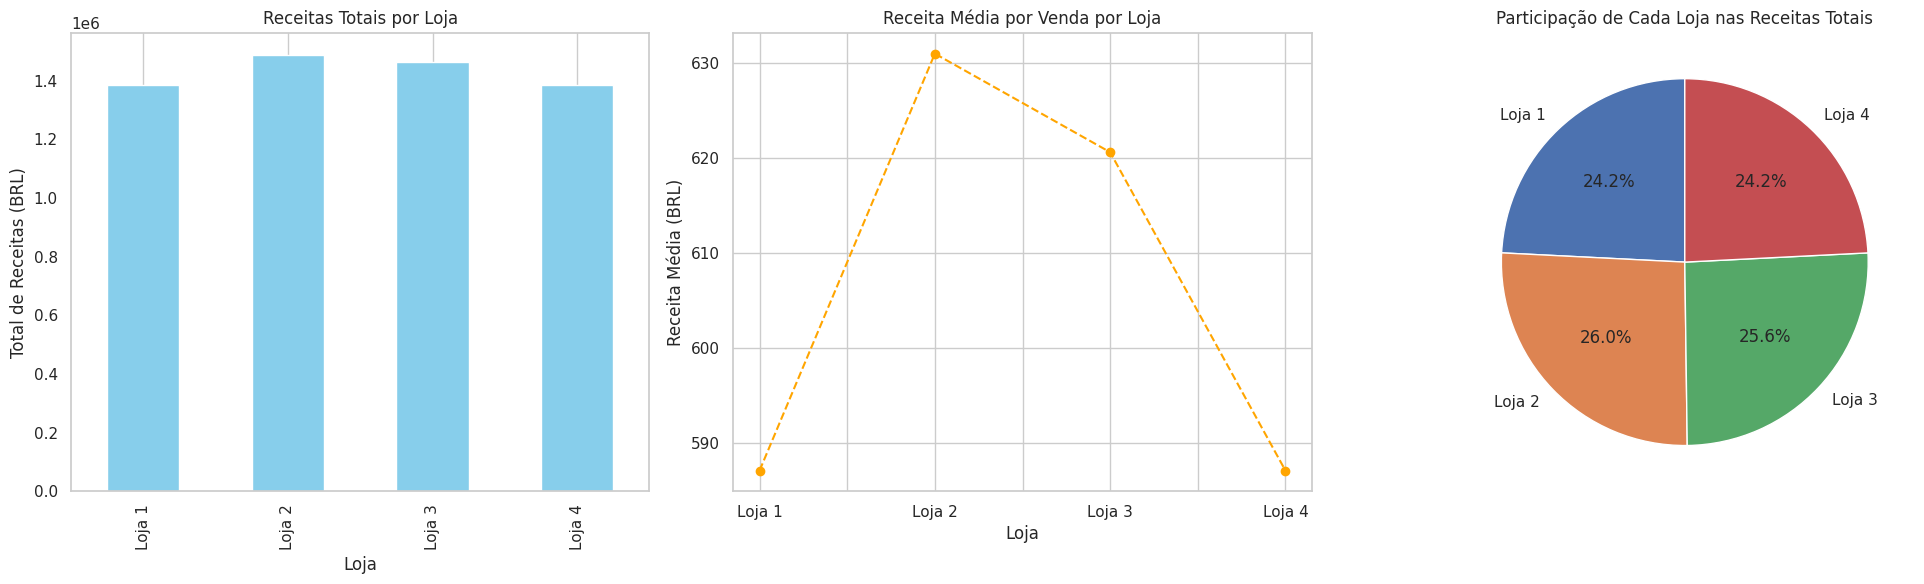

In [ ]:
import matplotlib.pyplot as plt

# 1. Certifique-se de que 'Preço' seja numérico (float)
df_total['Preço'] = pd.to_numeric(df_total['Preço'], errors='coerce')

# 2. A receita de cada venda é simplesmente o preço
df_total['Receita'] = df_total['Preço']

# 3. Agrupar dados
receitas_totais = df_total.groupby('Loja')['Receita'].sum()
receita_media = df_total.groupby('Loja')['Receita'].mean()

# 4. Gerar os gráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1 linha, 3 colunas

# Gráfico de barras
receitas_totais.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Receitas Totais por Loja')
axes[0].set_ylabel('Total de Receitas (BRL)')
axes[0].set_xlabel('Loja')
axes[0].grid(axis='y')

# Gráfico de linhas
receita_media.plot(kind='line', marker='o', linestyle='--', color='orange', ax=axes[1])
axes[1].set_title('Receita Média por Venda por Loja')
axes[1].set_ylabel('Receita Média (BRL)')
axes[1].set_xlabel('Loja')
axes[1].grid(True)

# Gráfico de pizza
receitas_totais.plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=axes[2])
axes[2].set_title('Participação de Cada Loja nas Receitas Totais')
axes[2].set_ylabel('')

# Ajustar o layout e exibir os gráficos
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from urllib.request import urlopen
import csv

# ... (your existing code to read URLs and define functions)

# Create df_total DataFrame
urls = [url, url2, url3, url4]  # Assuming these URLs are defined earlier
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# ... (rest of your code using df_total)

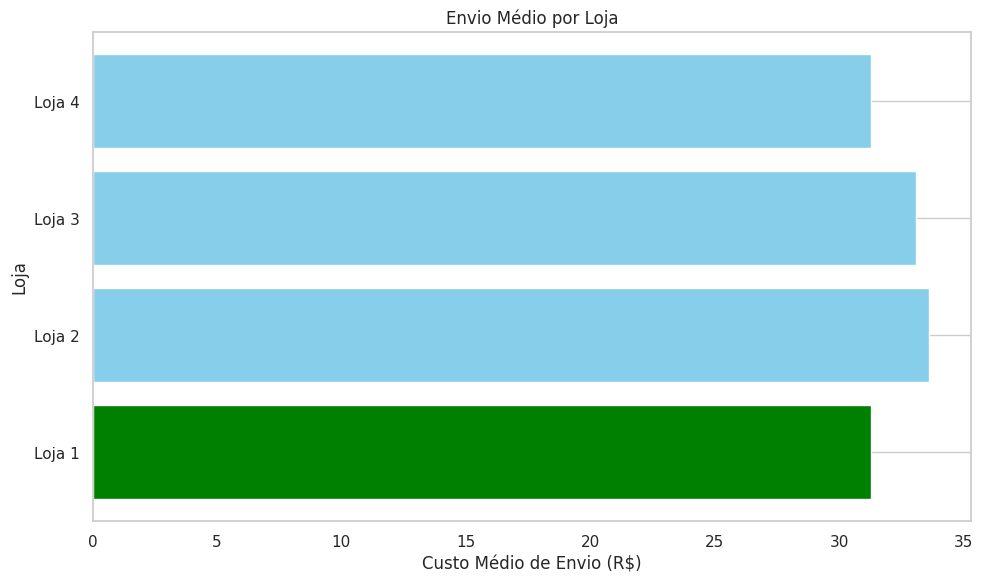

In [ ]:
# Create df_total DataFrame
urls = [url, url2, url3, url4]  # URLs definidas anteriormente
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Garantir que o custo de envio é numérico
df_total['Frete'] = df_total['Frete'].astype(float)

# Agrupar por loja e calcular a média do custo de envio
envio_medio = df_total.groupby('Loja')['Frete'].mean()

# Encontrar a loja com o menor envio médio
loja_menor_envio = envio_medio.idxmin()

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
cores = ['skyblue'] * len(envio_medio)  # Define cores padrão para todas as barras
cores[envio_medio.index.get_loc(loja_menor_envio)] = 'green'  # Define a cor da barra da loja com menor envio

# Cria o gráfico de barras com cores personalizadas
ax = plt.barh(envio_medio.index, envio_medio.values, color=cores)

plt.title('Envio Médio por Loja')
plt.xlabel('Custo Médio de Envio (R$)')
plt.ylabel('Loja')
plt.grid(axis='x')  # Grade no eixo x

# Remove os rótulos de destaque (se houver)
# ax.containers[0].remove()

plt.tight_layout()
plt.show()

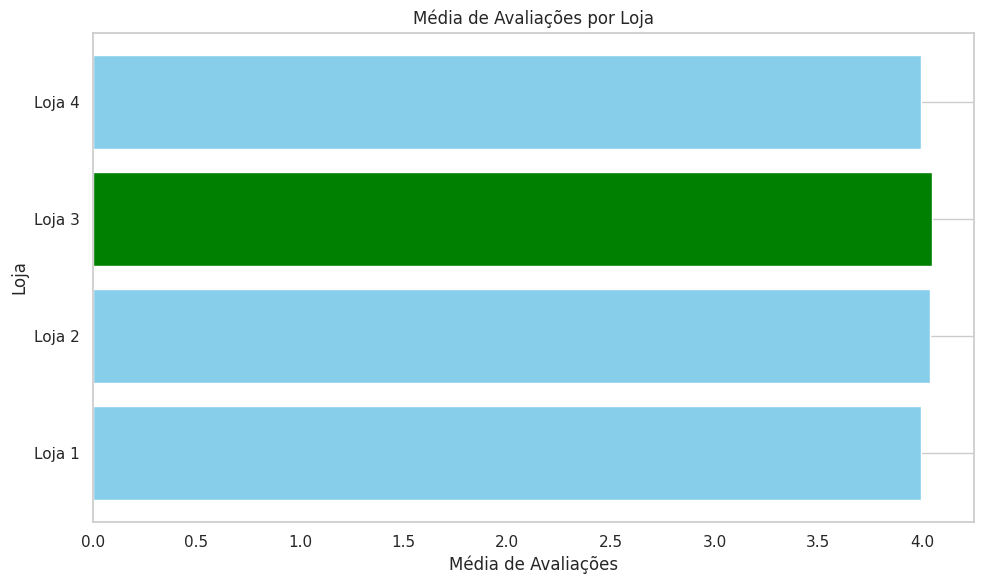

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ... (Seu código para ler os URLs e definir funções) ...

# Create df_total DataFrame
urls = [url, url2, url3, url4]  # URLs definidas anteriormente
df_total = pd.concat(
    [pd.read_csv(url).assign(Loja=f"Loja {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Garantir que 'Avaliação da compra' seja numérico
df_total['Avaliação da compra'] = pd.to_numeric(df_total['Avaliação da compra'], errors='coerce')

# Calcular a média de avaliações por loja
avaliacao_media = df_total.groupby('Loja')['Avaliação da compra'].mean()

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
cores = ['skyblue'] * len(avaliacao_media)  # Define cores padrão para todas as barras

# Get the index of the minimum value as an integer
max_index = avaliacao_media.argmax()  # Use argmin() instead of idxmin()

cores[max_index] = 'green'  # Define a cor da barra da loja com a menor média de avaliações

ax = plt.barh(avaliacao_media.index, avaliacao_media.values, color=cores)

plt.title('Média de Avaliações por Loja')
plt.xlabel('Média de Avaliações')
plt.ylabel('Loja')
plt.grid(axis='x')  # Grade no eixo x

# Remove os rótulos de destaque (se houver)
# ax.containers[0].remove()

plt.tight_layout()
plt.show()

##Análise de dados - Lojas do João##
A presente análise  tem como finalidade auxiliar o Senhor João, proprietário de quatro quatro lojas, na tomada de decisão sobre qual loja vender para iniciar um novo empreendimento. Para isso, foram analisados os dados de vendas, desempenho e avaliações das lojas da rede, com o intuito de identificar qual apresenta o menor desempenho e justificar a recomendação com base em métricas estratégicas.


De acordo com os dados  apresentados a loja com maior faturamento é a Loja 1, com um faturamento de  1.534.509,12 reais e a loja com o menor é a Loja 4 com uma margem de lucro de 1.384.497,58 reais.

A metodologia adotada para esta análise se baseou na coleta, tratamento e consolidação de dados provenientes de diversas fontes internas, organizados e estruturados em uma planilha no formato CSV. Esta planilha continha informações detalhadas sobre o faturamento bruto, a margem de lucro líquida, o volume de vendas por período, os custos operacionais, o nível de satisfação dos clientes e outros indicadores julgados pertinentes para uma avaliação comparativa robusta. Foi utilizado o Google Colab para escrever e executar código Python.

A análise preliminar dos dados revela um panorama interessante do desempenho financeiro das quatro lojas. Em termos de faturamento bruto, a Loja 1 se destaca como a unidade com a maior receita, atingindo o montante de  1.534.509,12 reais no período analisado. Em contrapartida, a Loja 4 apresenta o menor faturamento entre as quatro unidades, registrando uma receita de  1.384.497,58 reais no mesmo período. Conforme gráfico 1.
Gráfico 1 : https://colab.research.google.com/drive/1EU4VidGEVH5F1tZ6x_3dBQDDLb4ioQBO#scrollTo=bt3g22_zDfUh

Os três produtos mais vendidos nas lojas são:

eletrônicos: 6.519.744,59 reais

eletrodomésticos: 5.358.770,66 reais

móveis: 2962647.31 reais

É importante ressaltar que a decisão de qual loja vender não deve ser baseada unicamente no critério do menor faturamento bruto. Uma análise mais detalhada se faz necessária.

Os próximos passos desta análise apresenta o valor do frete médio por loja, onde a Loja 4 traz a menor taxa em comparação às demais, diferente da Loja 4 com a maior taxa de envio. Conforme detalhes abaixo:

Envio médio por loja:

Loja 4: 31.28 reais

Loja 3: 33.07 reais

Loja 2: 33.62 reais

Loja 1: 34.69 reais

Gráfico 2: https://colab.research.google.com/drive/1EU4VidGEVH5F1tZ6x_3dBQDDLb4ioQBO#scrollTo=bt3g22_zDfUh&line=15&uniqifier=1


Outro ponto de destaque é referente a avaliação média por loja, a Loja 3 está em primeiro lugar com uma avaliação de 4.05 do máximo de 5.00, seguida da Loja 2 com 4.04 e Loja 4 com 4.00, sendo a Loja 1, com a menor avaliação, 3.98.

Gráfico 3: https://colab.research.google.com/drive/1EU4VidGEVH5F1tZ6x_3dBQDDLb4ioQBO#scrollTo=lUrLoIhnHUUg&line=3&uniqifier=1


Análise por Loja:

 Loja 1
Pontos Fortes: Maior faturamento bruto.
Pontos Fracos: Frete mais caro (impacta custos) e pior avaliação dos clientes

Loja 2
Pontos Fortes: Segundo melhor faturamento, frete mais baixo que a Loja 1 e  boa avaliação (4,04).

Loja 3
Pontos Fortes: Melhor avaliação (4,05) e frete mais baixo que Lojas 1 e 2.
Pontos fracos: Faturamento baixo, atrás apenas da Loja 4.

Loja 4
Pontos Fortes: Frete mais barato e avaliação melhor que a Loja 1
Pontos fracos: Menor faturamento bruto.

Após uma análise detalhada das quatro lojas, considerando faturamento, custos operacionais (frete) e satisfação dos clientes, recomenda-se que o Sr. João venda a Loja 1, mesmo sendo a que possui o maior faturamento bruto. Isso porque ela apresenta os custos logísticos mais altos (frete médio de  34,69 reais, o mais caro entre todas) e a pior avaliação dos clientes (3,98/5), o que pode indicar problemas operacionais ou de atendimento que impactam sua sustentabilidade no longo prazo.

A Loja 4, apesar de ter o menor faturamento, se destaca por ter o frete mais barato ( 31,28 reais) e uma avaliação dos clientes superior à Loja 1 (4,00/5), mostrando maior eficiência operacional e melhor percepção do público. Já as Lojas 2 e 3 apresentam um bom equilíbrio: avaliações mais altas (4,04 e 4,05, respectivamente) e fretes mais competitivos que a Loja 1, sendo, portanto, estratégicas para manter no negócio.

Portanto, a venda da Loja 1 permitiria ao Sr. João capitalizar seu maior faturamento imediato enquanto reduz custos operacionais e melhora a satisfação geral da rede, realocando recursos para seu novo empreendimento. Para uma decisão ainda mais embasada, seria ideal analisar o lucro líquido de cada loja (não apenas o faturamento) e avaliar fatores locacionais, como concorrência e potencial de expansão das unidades remanescentes.Recomenda-se a venda da Loja 1, apesar do maior faturamento, devido aos altos custos de frete ( 34,69 reais, o mais caro) e a pior avaliação dos clientes (3,98/5), indicando problemas de sustentabilidade. A Loja 4 destaca-se pelo menor frete ( 31,28 reais) e melhor avaliação (4,00/5). Lojas 2 e 3 possuem bom equilíbrio (avaliações de 4,04 e 4,05 e fretes competitivos). Vender a Loja 1 otimiza custos, melhora a satisfação e permite realocar recursos. Análise do lucro líquido e fatores locacionais são recomendados para uma decisão mais precisa.

